# Supervised Machine Learning - Regression

1. Import Libraries
2. Import Data
3. Cleaning Data
4. Preparing Data
5. Regression Testing
6. Insights

# 1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2 Import Data

In [2]:
path = r'C:\Users\benar\CareerFoundry\01-2024 IMDB Movies Analysis'

In [3]:
df_mov = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'Movies_clean.csv'))

In [4]:
df_mov.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98


# 3 Cleaning Data

In [5]:
df_mov.isnull().sum()

name           0
rating         0
genre          0
year           0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      2169
gross        186
company        0
runtime        0
dtype: int64

In [6]:
#replacing missing values in gross with median
df_mov['gross'].fillna(df_mov['gross'].median(), inplace = True)

In [7]:
df_mov.isnull().sum()

name           0
rating         0
genre          0
year           0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      2169
gross          0
company        0
runtime        0
dtype: int64

In [8]:
# replace missing values in budget column with median values grouped by year
df_mov['budget'].fillna(df_mov.groupby('year')['budget'].transform('median'), inplace = True)

In [9]:
df_mov.isnull().sum()

name        0
rating      0
genre       0
year        0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [10]:
#9 Export clean files
df_mov.to_csv(os.path.join(path, 'Data','Prepared Data', 'Movies_clean_wrangled.csv'))

# 4 Preparing Data

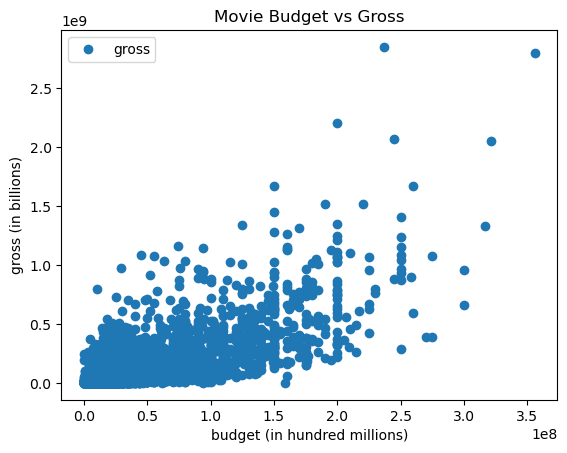

In [11]:
# Scatter plot of budget vs gross, a very intriguing correlation to explore
df_mov.plot(x = 'budget', y='gross',style='o')
plt.title('Movie Budget vs Gross')  
plt.xlabel('budget (in hundred millions)')  
plt.ylabel('gross (in billions)')  
plt.show()

Prediction Hypothesis: The higher the budget, the higher the gross revenue

In [12]:
# Creating Numpy arrays
X = df_mov['budget'].values.reshape(-1,1)
y = df_mov['gross'].values.reshape(-1,1)

In [13]:
X

array([[1.900e+07],
       [4.500e+06],
       [1.800e+07],
       ...,
       [5.875e+04],
       [1.500e+04],
       [4.350e+07]])

In [14]:
y

array([[4.69987720e+07],
       [5.88531060e+07],
       [5.38375067e+08],
       ...,
       [2.02084960e+07],
       [2.02084960e+07],
       [2.02084960e+07]])

In [15]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 5 Regression Testing

In [16]:
#Creating regression object
regression = LinearRegression()

In [17]:
# fitting regression object onto training set
regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict y values
y_predicted = regression.predict(X_test)

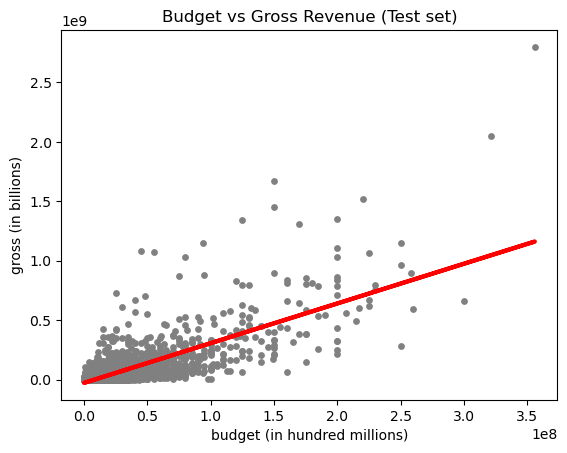

In [45]:
# plot of model on test set

plt.scatter(X_test, y_test, color='gray', s = 15)
plt.plot(X_test, y_predicted, color='red', linewidth =3)
plt.title('Budget vs Gross Revenue (Test set)')
plt.xlabel('budget (in hundred millions)')
plt.ylabel('gross (in billions)')

#Exporting viz
plt.savefig(os.path.join(path, 'Analysis','Visualizations', 'regression_test_budget_gross.png'))

plt.show()

The line appears to fit the data well, though there are a lot of outliers far away from the regression line that would suggest it doesn't fit as well as it appears

In [20]:
#  creating performance statistic objects
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [21]:
# printing summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.33876203]]
Mean squared error:  1.2989871017517968e+16
R2 score:  0.5541742977755053


In [22]:
y_predicted

array([[9.02333999e+07],
       [7.35395898e+07],
       [2.01193974e+07],
       ...,
       [2.34581594e+07],
       [8.68252182e+04],
       [7.02008278e+07]])

In [23]:
# creating dataframe of actual vs predicted y values
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,78201830.0,9.023340e+07
1,14273033.0,7.353959e+07
2,39673161.0,2.011940e+07
3,48017402.0,2.679692e+07
4,2819485.0,2.345816e+07
5,14296438.0,9.023340e+07
6,2005840.0,2.345816e+07
7,429028.0,-9.929461e+06
8,8481254.0,7.353959e+07
9,31070211.0,7.353959e+07


# 6 Insights

It's pretty clear that the model did not perform stellar on the test set. This is most evident when looking at the mean squared error, or the dataframe of actual vs predicted y values. There is a very large variance in the dataset, especially for the gross variable, and so this large range of values and variance definitely skews the model so that it is tough to fit.

A solution to make the model better might be reached by eliminating outliers and extreme values, but that takes away from very real results that should still be included in the model. Otherwise there definitely would be introduced bias into the model.

Overall, perhaps this relationship can be predicted through another method